# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mergedData = pd.merge(mouse_metadata, study_results, on=['Mouse ID'])

# Display the data table for preview
mergedData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
numberOfMice = mergedData['Mouse ID'].nunique()
numberOfMice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# .duplicated(keep=False) checking for duplicated data
duplicateMice = mergedData.duplicated (['Mouse ID', 'Timepoint'], keep=False)
#duplicateMice 
#checked the duplicate data
#created a dataframe using the mergedData compared to the duplicate data
duplicateMouseID = mergedData[duplicateMice]
duplicateMouseID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMouseIDUnique = duplicateMouseID['Mouse ID'].unique()
duplicateMouseIDUnique
#found the duplicate mouse using .unique()

array(['g989'], dtype=object)

In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDataMouse = mergedData.drop_duplicates(['Mouse ID', 'Timepoint'], keep=False)

cleanDataMouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
(cleanDataMouse.loc[:,'Mouse ID']=='g989').sum()
cleanMouseDF = mergedData[mergedData['Mouse ID']!='g989']

In [46]:
# Checking the number of mice in the clean DataFrame.
cleanDataMouseID = cleanMouseDF['Mouse ID'].nunique()
cleanDataMouseID


248

## Summary Statistics

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
meanData = cleanMouseDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medianData = cleanMouseDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
varianceData = cleanMouseDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdevData = cleanMouseDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
semData = cleanMouseDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summaryData = pd.DataFrame({
    'Mean Tumor Volume': meanData,
    'Median Tumor Volume':medianData,
    'Tumor Volume Variance': varianceData,
    'Tumor Volume Std. Dev.': stdevData,
    'Tumor Volume Std. Err.': semData
})

summaryData

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

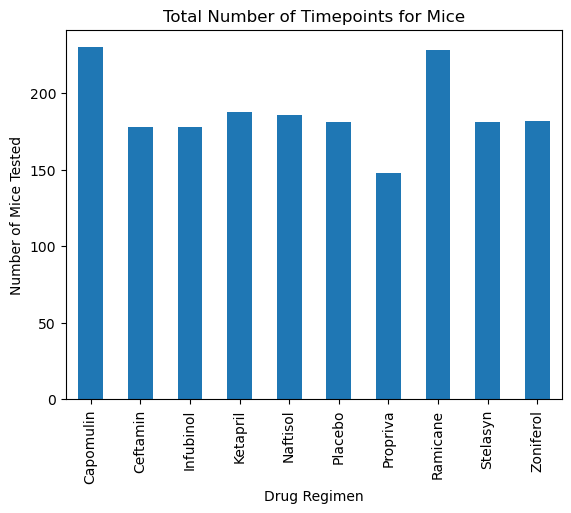

In [67]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = cleanMouseDF.groupby('Drug Regimen').count()['Timepoint']


# the timepoints are isolated
timepoints.plot(kind='bar')
#timpoints have been placed on a bar chart
plt.title('Total Number of Timepoints for Mice')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

plt.show()

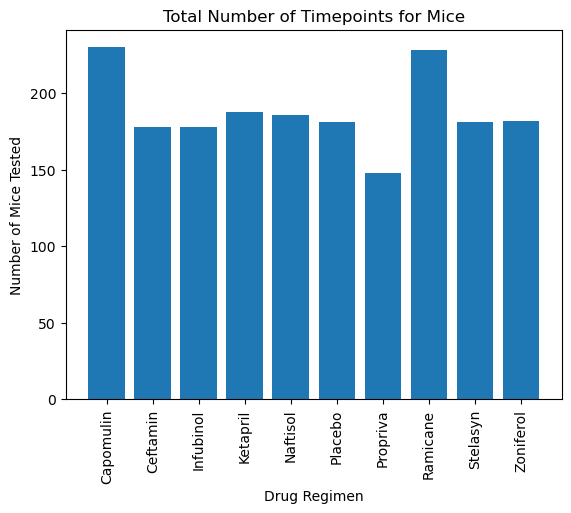

In [68]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints = cleanMouseDF.groupby('Drug Regimen').count()['Timepoint']
plt.bar(timepoints.index, timepoints.values)

plt.title('Total Number of Timepoints for Mice')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
#compared to the other graph teh x labels are messed up
plt.xticks(rotation=90)
plt.show()


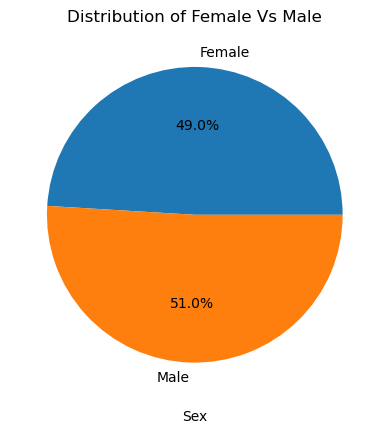

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
femaleVMale = cleanMouseDF.groupby('Sex').count()['Mouse ID']

femaleVMale.plot.pie(autopct='%1.1f%%')

plt.title('Distribution of Female Vs Male')
plt.xlabel('Sex')
plt.ylabel('')
plt.show()


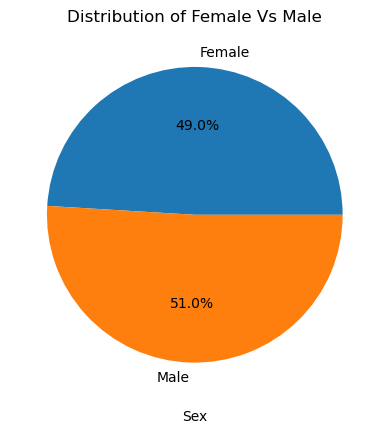

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
femaleVMale = cleanMouseDF.groupby('Sex').count()['Mouse ID']
plt.pie(femaleVMale, labels=femaleVMale.index, autopct='%1.1f%%')

plt.title('Distribution of Female Vs Male')
plt.xlabel('Sex')
plt.ylabel('')
plt.show()

## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
listRegimensData = cleanMouseDF[cleanMouseDF['Drug Regimen'].isin(Regimens)]
maxTimepoint = listRegimensData.groupby(['Mouse ID'])['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mergedTimepointData = pd.merge(maxTimepoint, mergedData, on=['Mouse ID', 'Timepoint'])
lastTimepoint = mergedTimepointData.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].last()
#now I have the last timepoint in the merged data
#lastTimepoint

In [73]:
# Put treatments into a list for for loop (and later for plot labels)
import numpy as np

# Create empty list to fill with tumor vol data (for plotting)
tumorVolData = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = lastTimepoint.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
 
    
listRegimensData = cleanMouseDF[cleanMouseDF['Drug Regimen'].isin(Regimens)]
    # Locate the rows which contain mice on each drug and get the tumor volumes

regimenVolumes = listRegimensData.groupby('Tumor Volume (mm3)')   
countVolumes = regimenVolumes['Tumor Volume (mm3)'].count()
#this is the same as above
    # add subset 
    
for x in Regimens:
    eachRegimen = cleanMouseDF['Drug Regimen'] == x
    drugVolumes = cleanMouseDF[eachRegimen]['Tumor Volume (mm3)']
    tumorVolData.append(drugVolumes)
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#prints
print(lowerq)
print(upperq)
print(iqr)
print(quartiles[0.5])
print(lower_bound)
print(upper_bound)


37.1877438025
59.930261755
22.742517952499995
45.0
3.0739668737500097
94.04403868374999


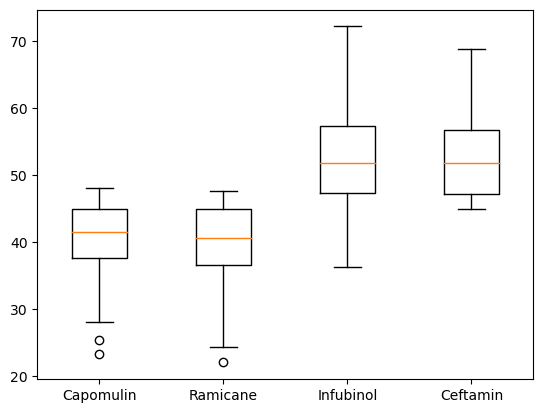

In [74]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumorVolData, labels=Regimens)
plt.show()

## Line and Scatter Plots

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# tumor volume vs time point
#mouse I509

capomulinDrug = cleanMouseDF[cleanMouseDF['Drug Regimen'] == 'Capomulin']
mouseCapomulin = capomulinDrug[capomulinDrug['Mouse ID'] == 's185']

#mouseIDCapomulin = pd.DataFrame({
   # 'timepoint': mouseCapomulin.groupby('Mouse ID')['Timepoint'],
   # 'Tumor Volume': mouseCapomulin.groupby('Mouse ID')['Tumor Volume (mm3)']
#})
#mouseIDCapomulin.plot(x='timepoint', y='Tumor Volume', kind='line')
#capomulinDrug['Mouse ID'].value_counts()
mouseCapomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


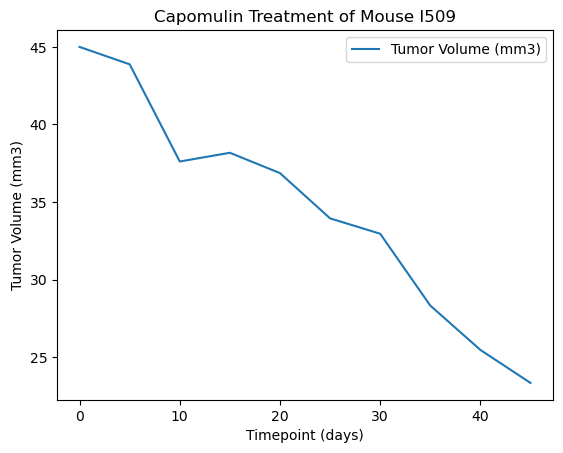

<Figure size 640x480 with 0 Axes>

In [64]:
mouseCapomulin.plot('Timepoint', 'Tumor Volume (mm3)',kind = 'line')
plt.title('Capomulin Treatment of Mouse s185')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
plt.tight_layout()

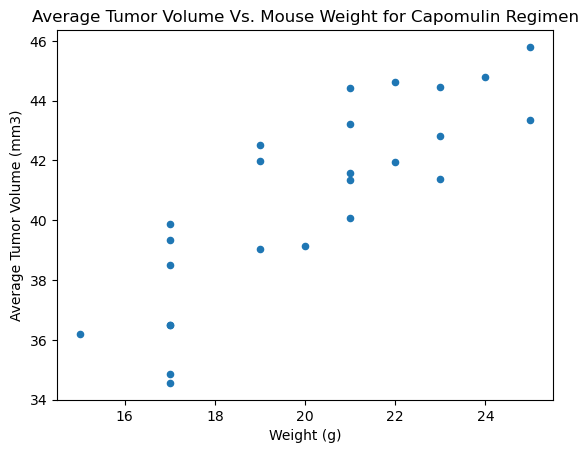

In [65]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#tumor volume vs mouse weight
#mouseID = "i509"
capomulinDrug = cleanMouseDF[cleanMouseDF['Drug Regimen'] == 'Capomulin']
avgVolume = capomulinDrug.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

scatterData = pd.DataFrame({
    'Weight': capomulinDrug.groupby('Mouse ID')['Weight (g)'].first(),
    'Average Volume': avgVolume.values,
    'Mouse ID': avgVolume.index
})

# I don't know if we were supposed to do a dataframe here, but I kept getting undefined errors
scatterData.plot(x='Weight',y='Average Volume',kind='scatter')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume Vs. Mouse Weight for Capomulin Regimen')
plt.show()


## Correlation and Regression

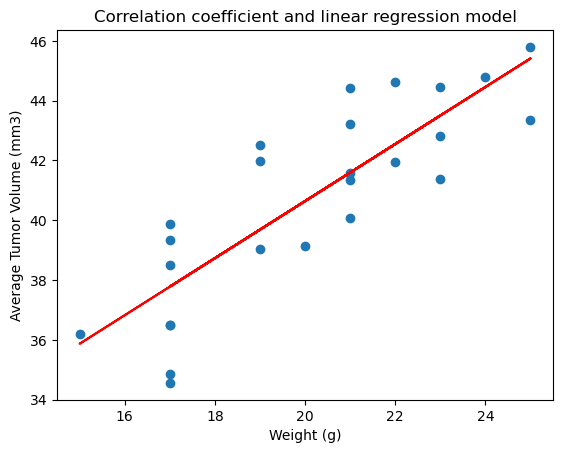

The correlation between mouse weight and the average tumor volume is PearsonRResult(statistic=0.8419363424694721, pvalue=1.3225722434712388e-07)


In [40]:
from scipy.stats import linregress
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(scatterData['Weight'], scatterData['Average Volume'])

correlation = st.pearsonr(scatterData['Weight'],scatterData['Average Volume'])
#intercept = round(intercept,5)
#slope = round (slope,5)
#line = f('y = {slope}x + {intercpet}')
x_values = scatterData['Weight']
y_values = scatterData['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Correlation coefficient and linear regression model')
plt.show()
print(f'The correlation between mouse weight and the average tumor volume is {correlation}')